## Segregación socioresidencial en el partido de San Martín: análisis comparativo en GBA24

Este trabajo se apoya en el artículo publicado por Joan Carles Martori i Cañas & Karen Hoberg (2004) bajo el título "INDICADORES CUANTITATIVOS DE SEGREGACIÓN RESIDENCIAL. EL CASO DE LA POBLACIÓN INMIGRANTE EN BARCELONA". En el mismo, los autores evalúan el desempeño de un conjunto de índices para estuadiar patrones de asentamiento de población migrante en Barcelona. En nuestro caso, adaptamos la metodología para enfocarnos en la incidencia de factores socioeconómicos. 

Para ello, tomamos como insumo principal las distribución de hogares con NBI (INDEC) en los radios censales de los 24 partidos que conforman el Gran Buenos Aires.

El mencionado artículo se puede consultar en: http://www.ub.edu/geocrit/sn/sn-169.htm

In [1]:
# Importamoss librerias útiles
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
from matplotlib import rc
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl

In [2]:
# Estilos de los graficos
plt.style.use('ggplot')

In [3]:
# Base de partidos
partidos = pd.read_csv("data/partido_nbi_gba24.csv", encoding='latin-1')

In [4]:
# Base de radios censales
radios = pd.read_csv("data/radios_nbi_gba24.csv", encoding='latin-1')

### Necesidades básicas insatisfechas (NBI) 

Para trabajar en base al nivel socioeconómico de la población tomamos un índice sintético muy sencillo y fácil de interpretar que elabora el Instituo Nacional de Estadísticas y Censos (INDEC). Este contempla 5 características de los hogares:

1) Vivienda inconveniente (NBI 1): es el tipo de vivienda que habitan los hogares que moran en habitaciones de inquilinato, hotel o pensión, viviendas no destinadas a fines habitacionales, viviendas precarias y otro tipo de vivienda. Se excluye a las viviendas tipo casa, departamento o rancho. 

2) Carencias sanitarias (NBI 2): incluye a los hogares que no poseen retrete. 

3) Condiciones de Hacinamiento (NBI 3): es la relación entre la cantidad total de miembros del hogar y la cantidad de habitaciones de uso exclusivo del hogar. Técnicamente se considera que existe hacinamiento crítico cuando en el hogar hay más de tres personas por cuarto. 

4) Inasistencia escolar (NBI 4): hogares que tienen al menos un niño en edad escolar (6 a 12 años) que no asiste a la escuela. 

5) Capacidad de subsistencia (NBI 5): incluye a los hogares que tienen cuatro o más personas por miembro ocupado y que tienen un jefe que no ha completado el tercer grado de escolaridad primaria. 

#### Ubicación de los hogares con NBI en el territorio: un análisis desde la perspectiva de la segregación espacial  

La segregación hace referencia a la distribución de un grupo de población en el espacio urbano. Este se encuentra segregado si no se encuentra distribuido de manera equilibrada entre las secciones censales que conforman un área administrativa superior. Por ejemplo, si un grupo representa el 20% del total de la población de un municipio, en cada sección censal debería haber (en el caso de no-segregación), un porcentaje similar de población perteneciente a este grupo. Cuanto más alejado de esta situación se encuentre el grupo en cuestión, mayor será la segregación residencial del mismo.

El índice de segregación que aplicaremos para entender la distribución territorial de hogares con NBI en el partido de San Martín se conoce como 'Índice de segregación de Duncan'. Este mide la distribución de un determinado grupo de población en el espacio urbano. Varía entre cero y uno, valores que corresponden respectivamente a una distribución exactamente igualitaria y una distribución de máxima segregación.

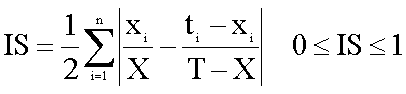

##### Cálculo del índice de segregación 

In [5]:
# Asignamos los valores totales de hogares y nbi de cada departamento a la base de radios

radios['NBI_DTO'] =  radios['PARTIDO'].map(partidos.set_index('PARTIDO')['NBI_SI'])

radios['HOG_DTO'] =  radios['PARTIDO'].map(partidos.set_index('PARTIDO')['TOTAL'])

In [6]:
# Se calcula el absoluto para cada radio. Este es el insumo para calcular el índice de segregación por departamento
radios['ABS'] = np.abs((radios['NBI_SI']/radios['NBI_DTO']) - ((radios['HOGARES'] - radios['NBI_SI'])/(radios['HOG_DTO'] - radios['NBI_DTO'])))

In [7]:
# Índice de segregación espacial por departamento
ISE = ((radios.groupby(['PARTIDO'])[['ABS']].sum()*0.5).round(3)).reset_index()

In [8]:
# Sumamos el porcentaje de hogares con nbi y el índice de segregación por departamento
partidos['Z_NBI'] = ((partidos['NBI_SI']/partidos['TOTAL'])*100).round(2)

partidos['ISE'] = ISE['ABS']

partidos['ISE100'] = (ISE['ABS']*100).round(2)

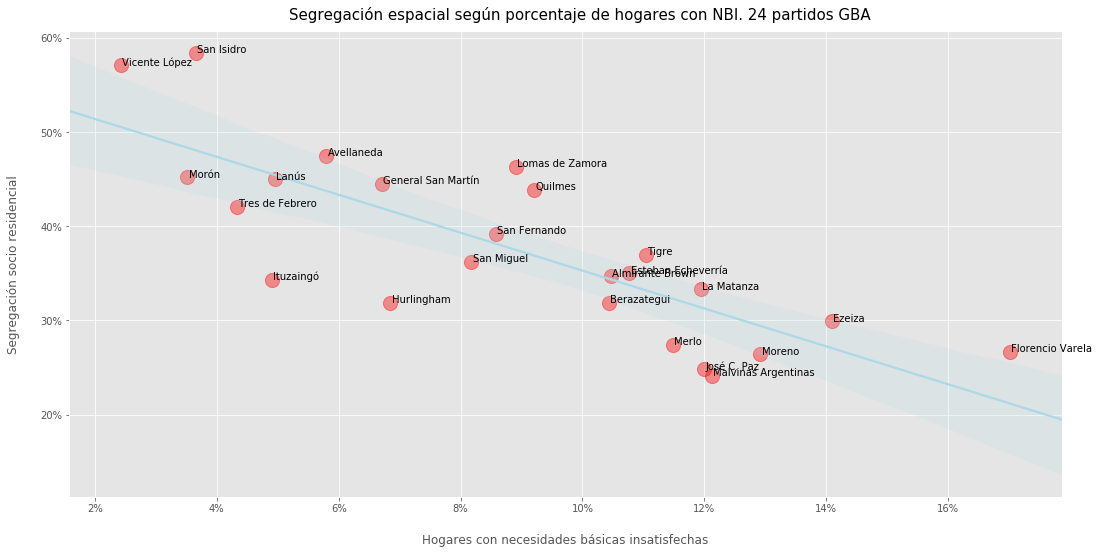

In [9]:
# Ploteamos el ISE para GBA24

ise_nbi = sns.lmplot(x='Z_NBI', y='ISE100', data=partidos, aspect = 2, height=7.5, 
          line_kws={'color':'lightblue'}, scatter_kws={'color':'Red','alpha':0.4,'s': 200}, 
          fit_reg = True)

ise_nbi.fig.suptitle('Segregación espacial según porcentaje de hogares con NBI. 24 partidos GBA', fontsize=15, x=0.54, y=1.02)
plt.xlabel('Hogares con necesidades básicas insatisfechas', labelpad=20)
plt.ylabel('Segregación socio residencial', labelpad=20)

plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
plt.gca().set_xticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_xticks()]) 

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(partidos.Z_NBI, partidos.ISE100, partidos.PARTIDO, plt.gca())

plt.tight_layout()


plt.show();

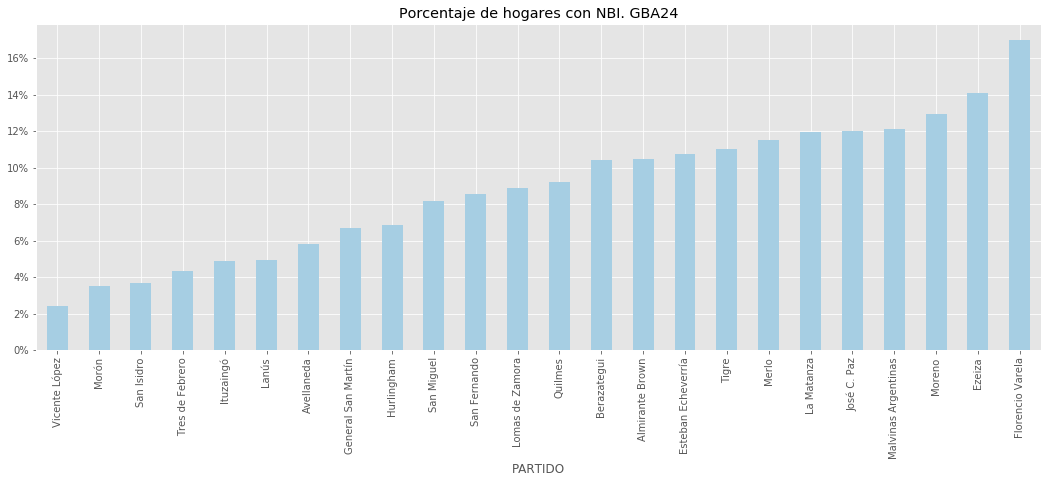

In [10]:
# Porcentaje de hogares con NBI en el partido. GBA24 - CNPHV2010
partidos.sort_values(by='Z_NBI',ascending='True').plot(x='PARTIDO',y='Z_NBI', kind='bar', figsize=(18,6), legend=False, title='Porcentaje de hogares con NBI. GBA24', colormap='Paired')
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()]);

En el partido de San Martín, la cantidad de hogares con al menos alguna necesidad básica insatisfecha casi alcanza el 7%. Esto significa el octavo lugar entre los diez partidos con menor porcentaje de NBI.

In [11]:
from IPython.display import IFrame

IFrame('https://fcatalano85.carto.com/builder/adb57599-e6ef-4aa1-8368-c9d15328c8d2/embed', 1000,550)

In [12]:
IFrame('https://pymap.carto.com/builder/5ebce1c0-c949-4249-910c-8284dfc39f7b/embed', 1000,550)

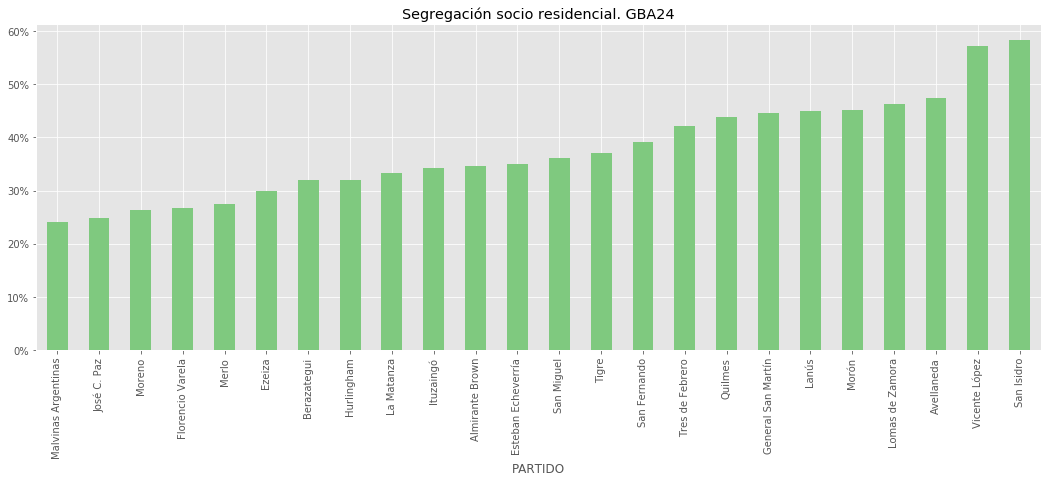

In [13]:
# Segregacion socio residencial en los 24 partidos del GBA
partidos.sort_values(by='ISE100',ascending='True').plot(x='PARTIDO',y='ISE100', kind='bar', figsize=(18,6), legend=False, title='Segregación socio residencial. GBA24', colormap='Accent')
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()]);

El comportamiento del índice de segregación permite deducir una relación inversa respecto del NBI. Si bien San Martín se encuentra entre los partidos con menor porcentaje de hogares con este tipo de necesidades, estos probablemente se encuentren concentrados en un área específica del partido. Por lo que se puede visualizar en el mapa, estos se localizan principalmente en el área lindera al Camino del Buen Ayre. Como una observación a tener en cuenta, cabe mencionar que si bien muchos de los partidos que presentan un nivel de segregación bajo, la contracara de esto podría interpretarse como un alto porcentaje de NBI hacia el interior del partido. En otras palabras, los hogares con NBI no se encuentran segregados porque probablemente su expansión territorial sea más amplia.

# Segregacion socioresidencial en las 27 localidades de San Martin

In [14]:
import geopandas as gpd
import shapely as shape
import mplleaflet
from PIL import Image
%matplotlib inline
from geopandas.tools import sjoin

In [15]:
# Localidades de San Martin
localidades = gpd.read_file('data/localidades_asentamientos_renabap.shp')

In [16]:
# Datos de nbi por radio censal en San Martin
nbi_sm = radios.loc[radios.PARTIDO == 'General San Martín']

In [17]:
# Geodataframe con radios de San Martin
radios_sm = gpd.read_file('data/radios_sm.shp')

In [18]:
# Creamos una columna con el mismo link para hacer un join de tablas

nbi = nbi_sm.copy()

nbi['LINK_B'] = ['0'+str(i) for i in nbi.LINK]   

In [19]:
nbi.head(4)

,PARTIDO,LINK,NBI_NO,NBI_SI,HOGARES,NBI_DTO,HOG_DTO,ABS,LINK_B
1921,General San Martín,63710101,268,75,343,8936,133202,0.006236,063710101
1922,General San Martín,63710102,273,15,288,8936,133202,0.000518,063710102
1923,General San Martín,63710103,333,72,405,8936,133202,0.005378,063710103
1924,General San Martín,63710104,226,8,234,8936,133202,0.000923,063710104


In [20]:
# Unimos la info de NBI al gdf de radios censales
radios_nbi = pd.merge(radios_sm,nbi, left_on = 'link', right_on = 'LINK_B')

In [21]:
# Agregamos la etiqueta de localidad a nuestro gdf de radios censales
radios_localidad = sjoin(radios_nbi.to_crs(epsg=4326), localidades.to_crs(epsg=4326), how="left")

In [22]:
radios_localidad.columns

Index(['link', 'TIPO', 'totpob', 'densidad', 'geometry', 'PARTIDO', 'LINK',
       'NBI_NO', 'NBI_SI', 'HOGARES', 'NBI_DTO', 'HOG_DTO', 'ABS', 'LINK_B',
       'index_right', 'LOCALIDAD', 'NRO', 'Ventas', 'Supvta_m2', 'Precio_M2',
       'Alquileres', 'Supalq_m2', 'Precio_ARS', 'COUNT', 'COUNT_2', 'NOMBRE',
       'VIVIENDA'],
      dtype='object')

In [23]:
# Borramos las columnas que no necesitamos
radios_localidad.drop(columns=['ABS', 'LINK_B','index_right', 'NRO', 'Ventas', 'Supvta_m2', 'Precio_M2','Alquileres', 'Supalq_m2', 'Precio_ARS', 'COUNT', 'COUNT_2','NBI_DTO','HOG_DTO'],inplace=True)

In [24]:
radios_localidad.head(2)

,link,TIPO,totpob,densidad,geometry,PARTIDO,LINK,NBI_NO,NBI_SI,HOGARES,LOCALIDAD,NOMBRE,VIVIENDA
0,063713302,URBANO,1645,23.207004,POLYGON ((-58.5756189884568 -34.56353676241358...,General San Martín,63713302,350,70,420,VILLA CORONEL JOSE M ZAPIOLA,CORONEL ZAPIOLA,0.4
1,063712304,URBANO,563,5.918706,POLYGON ((-58.53347233990399 -34.5761490950041...,General San Martín,63712304,215,5,220,LIBERTADOR GENERAL JOSE DE SAN MARTIN,SAN MARTIN,2.8


In [25]:
# Definimos una df con caracteristicas de nuestra unidad territorial superior
localidad_nbi = radios_localidad.groupby(['NOMBRE'])['NBI_SI','HOGARES'].sum().reset_index()

In [26]:
def segregacion(x=radios_localidad):
    
    # Se agrega al gdf de unidades territoriales minimas el total de NBI y hogares en la unidad territorial superior
    x['NBI_LOC'] =  x['NOMBRE'].map(localidad_nbi.set_index('NOMBRE')['NBI_SI'])
    x['HOG_LOC'] =  x['NOMBRE'].map(localidad_nbi.set_index('NOMBRE')['HOGARES'])
    
    # Se calcula el absoluto para cada radio. 
    x['ABS'] = np.abs((x['NBI_SI']/x['NBI_LOC']) - ((x['HOGARES'] - x['NBI_SI'])/(x['HOG_LOC'] - x['NBI_LOC'])))
    
    # Índice de segregación espacial para la unidad territorial superior
    ISE = ((x.groupby(['NOMBRE'])[['ABS']].sum()*0.5).round(3)).reset_index()
    
    return ISE

In [27]:
# Aplicamos la funcion de segregacion y almacenamos los resultados en un df
segregacion = segregacion(radios_localidad)

In [28]:
# Sumamos el porcentaje de hogares con nbi y el índice de segregación para la unidad territorial superior
localidad_nbi['Z_NBI'] = ((localidad_nbi['NBI_SI']/localidad_nbi['HOGARES'])*100).round(2)
localidad_nbi['ISE'] = segregacion['ABS']
localidad_nbi['ISE100'] = (localidad_nbi['ISE']*100).round(2)

In [29]:
# Consolidamos un unico df
localidad_nbi.head()

,NOMBRE,NBI_SI,HOGARES,Z_NBI,ISE,ISE100
0,AGUADO,370,6471,5.72,0.521,52.1
1,AYACUCHO,139,2404,5.78,0.399,39.9
2,BARRIO PARQUE GSM,154,2554,6.03,0.159,15.9
3,BILLINGHURST,487,6041,8.06,0.220,22.0
4,CHACABUCO,262,4627,5.66,0.242,24.2


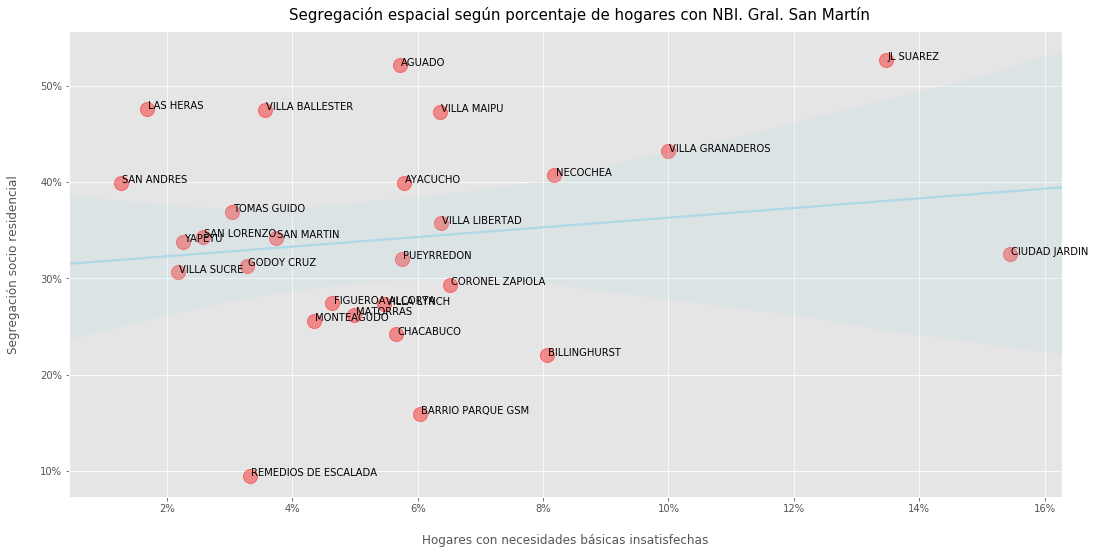

In [47]:
ise_nbi = sns.lmplot(x='Z_NBI', y='ISE100', data=localidad_nbi, aspect = 2, height=7.5, 
          line_kws={'color':'lightblue'}, scatter_kws={'color':'Red','alpha':0.4,'s': 200}, 
          fit_reg = True)

ise_nbi.fig.suptitle('Segregación espacial según porcentaje de hogares con NBI. Gral. San Martín', fontsize=15, x=0.54, y=1.02)
plt.xlabel('Hogares con necesidades básicas insatisfechas', labelpad=20)
plt.ylabel('Segregación socio residencial', labelpad=20)

plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
plt.gca().set_xticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_xticks()]) 

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(localidad_nbi.Z_NBI, localidad_nbi.ISE100, localidad_nbi.NOMBRE, plt.gca())

plt.tight_layout()


plt.show();

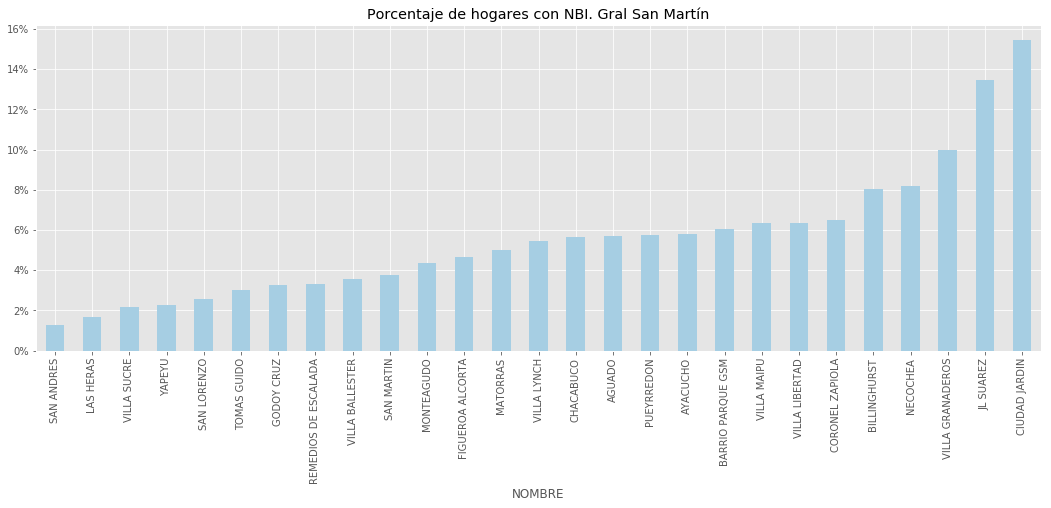

In [46]:
# Porcentaje de hogares con NBI en el partido de GRAL.SAN MARTIN - CNPHV2010
localidad_nbi.sort_values(by='Z_NBI',ascending='True').plot(x='NOMBRE',y='Z_NBI', kind='bar', figsize=(18,6), legend=False, title='Porcentaje de hogares con NBI. Gral San Martín', colormap='Paired')
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()]);

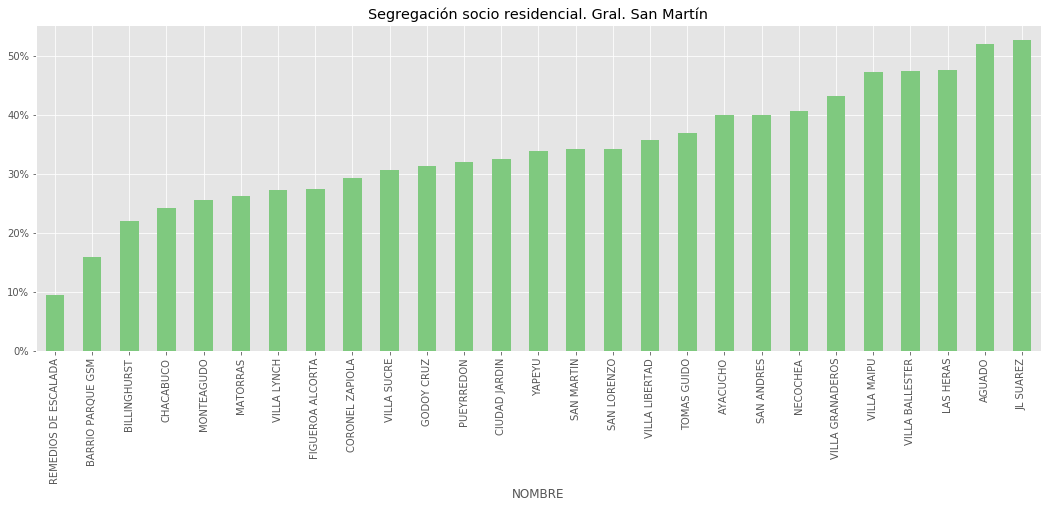

In [45]:
# Segregacion socio residencial en las 27 localidades del partido de GRAL.SAN MARTIN
localidad_nbi.sort_values(by='ISE100',ascending='True').plot(x='NOMBRE',y='ISE100', kind='bar', figsize=(18,6), legend=False, title='Segregación socio residencial. Gral. San Martín', colormap='Accent')
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()]);

La relación entre NBI y Segregación no tiene el mismo comportamiento que en todo el GBA24, aunque es interesante ver que en José León Suárez (la segunda localidad con mayor porcentaje de hogares con al menos un indicador NBI) es donde mayor segregación registra el índice. Donde no parece funcionar muy bien es en Ciudad Jardín. Sabemos que allí se concentra un número importante de asentamientos informales y debería comportarse de manera similar que en José León Suárez (este efecto podría estar dado por una menor frecuencia de hogares).

In [33]:
localidad = pd.merge(localidades, localidad_nbi, on='NOMBRE')

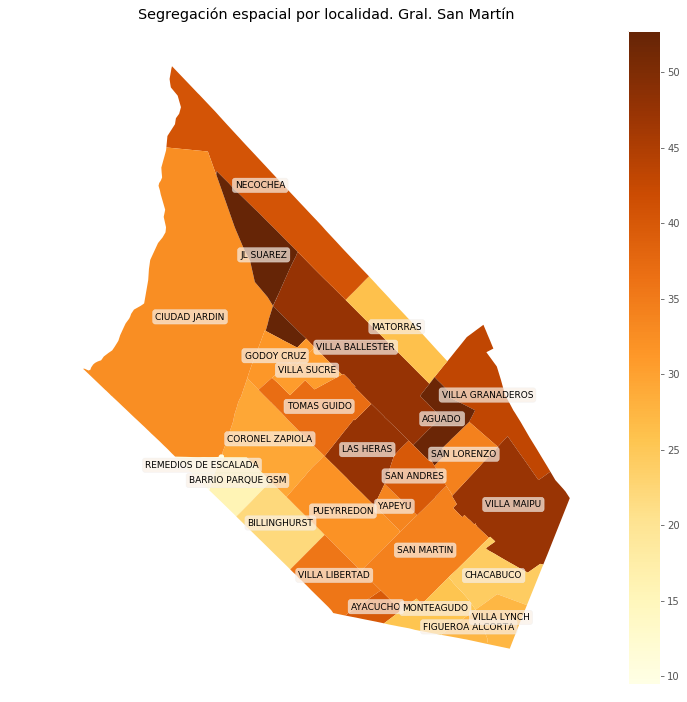

In [74]:
fig, ax = plt.subplots(1, figsize=(12,12))
localidad.plot(column='ISE100', cmap='YlOrBr', ax=ax, legend=True)
props = dict(boxstyle='round', facecolor='linen', alpha=0.7)
for point in localidad.iterrows():
    ax.text(point[1]['geometry'].centroid.x,
            point[1]['geometry'].centroid.y,
            point[1]['NOMBRE'],
            horizontalalignment='center',
            fontsize=9,
            bbox=props)
ax.set_title('Segregación espacial por localidad. Gral. San Martín',y=1.02)
ax.axis('off');

In [35]:
# Agregamos el porcentaje de NBI a nuestro gdf de radios censales de San Martin
radios_localidad['Z_NBI'] = ((radios_localidad['NBI_SI']/radios_localidad['HOGARES'])*100).round(2)

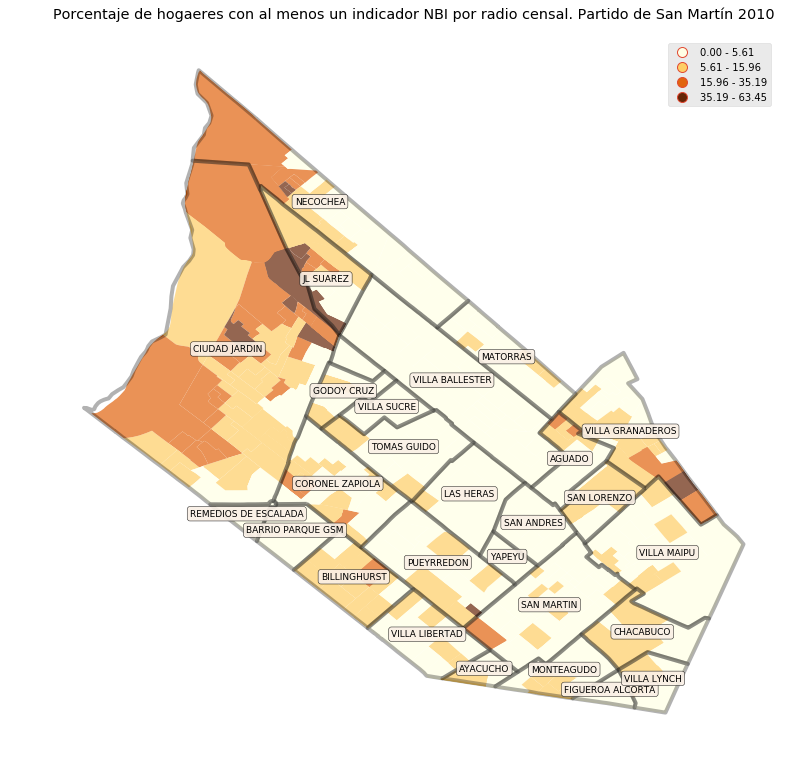

In [48]:
# Ploteamos el porcentaje de hogares con NBI
f, ax = plt.subplots(1,figsize=(13,13))
radios_localidad.plot(ax=ax, column = 'Z_NBI',cmap='YlOrBr',scheme='fisher_jenks', k=4, legend=True)
localidad.to_crs(crs=radios_localidad.crs).plot(ax=ax, color='white', edgecolor= 'black', linewidth = 4, alpha = 0.3)

props = dict(boxstyle='round', facecolor='linen', edgecolor= 'black', alpha=0.9)
for point in localidad.to_crs(crs=radios_localidad.crs).iterrows():
    ax.text(point[1]['geometry'].centroid.x,
            point[1]['geometry'].centroid.y,
            point[1]['NOMBRE'],
            horizontalalignment='center',
            fontsize=9,
            bbox=props)

plt.axis('equal')

ax.set_title('Porcentaje de hogaeres con al menos un indicador NBI por radio censal. Partido de San Martín 2010',y=1.02)
ax.set_axis_off();

In [37]:
# Importamos cartoframes y cargamos el usuario y la API Key
%matplotlib inline
import cartoframes
from cartoframes import Credentials
import pandas as pd

USERNAME = 'YOUR USER NAME'  
APIKEY = 'YOUR API KEY' 
creds = Credentials(username=USERNAME, 
                    key=APIKEY)
cc = cartoframes.CartoContext(creds=creds)

In [38]:
# Importamos estilos y mapa base
from cartoframes import Layer, styling, BaseMap

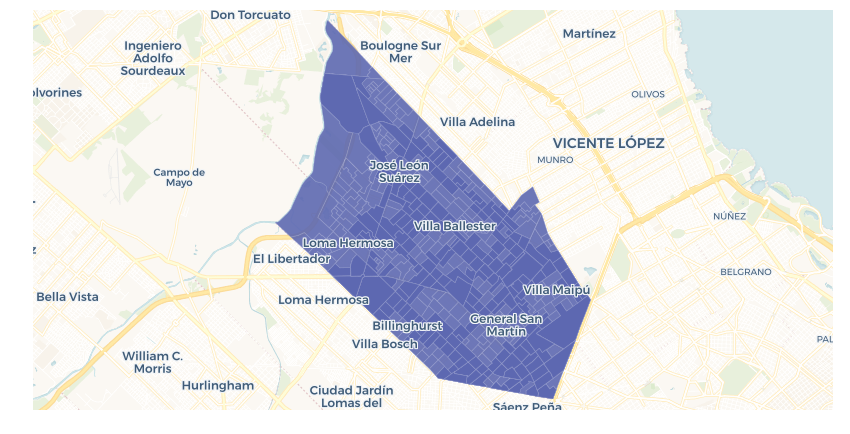

In [39]:
# Mapeamos el shape de radios censales (este esta previamente cargado en mi perfil de carto)
cc.map(layers=Layer('radios_sm'),
       interactive=False);

In [40]:
# Creamos el layer y lo mapeamos. Esta vez, interactivo. Cartoframes todavia no implementa las leyendas.
l = Layer('radios_sm',
          color={'column': 'z_nbi',
                 'scheme': styling.sunset(bins= 4, bin_method='quantiles') 
                },
          )
# Desde cc.map se puede controlar el tamaño y el zoom
cc.map(layers=l,
       interactive=True,
      size=(1000,423))

In [41]:
# Asi se puede almacenar el layer en un geodataframe y trabajarlo con pandas
df = cc.read('radios_sm', decode_geom=True)

In [42]:
df.reset_index().head(5)

,cartodb_id,abs,densidad,hog_loc,hogares,link,link_1,localidad,nbi_loc,nbi_no,nbi_si,nombre,partido,the_geom,tipo,totpob,vivienda,z_nbi,geometry
0,107,0.005553,0.803579,6155,32,063712803,63712803,VILLA LIBERTAD,392,32,0,VILLA LIBERTAD,General San Martín,0106000020E6100000010000000103000000010000000B...,URBANO,89,1.5,0.00,(POLYGON ((-58.55382324318531 -34.585313842037...
1,65,0.000589,7.710847,12823,371,063710802,63710802,VILLA MAIPU,814,347,24,VILLA MAIPU,General San Martín,0106000020E61000000100000001030000000100000014...,URBANO,1152,0.8,6.47,(POLYGON ((-58.52302096826993 -34.558972443422...
2,94,0.001699,21.569795,17705,296,063712308,63712308,LIBERTADOR GENERAL JOSE DE SAN MARTIN,663,286,10,SAN MARTIN,General San Martín,0106000020E61000000100000001030000000100000009...,URBANO,875,2.8,3.38,(POLYGON ((-58.53734885488664 -34.579422412969...
3,126,0.006474,7.268071,22874,227,063711205,63711205,VILLA BALLESTER,815,224,3,VILLA BALLESTER,General San Martín,0106000020E61000000100000001030000000100000009...,URBANO,536,1.8,1.32,(POLYGON ((-58.54712650775524 -34.547956184029...
4,153,0.228339,10.335985,12823,440,063710801,63710801,VILLA MAIPU,814,238,202,VILLA MAIPU,General San Martín,0106000020E61000000100000001030000000100000015...,URBANO,1492,0.8,45.91,(POLYGON ((-58.51948000376078 -34.561423538724...


In [43]:
df.dtypes

abs          float64
densidad     float64
hog_loc        int64
hogares        int64
link          object
link_1         int64
localidad     object
nbi_loc        int64
nbi_no         int64
nbi_si         int64
nombre        object
partido       object
the_geom      object
tipo          object
totpob         int64
vivienda     float64
z_nbi        float64
geometry      object
dtype: object

''

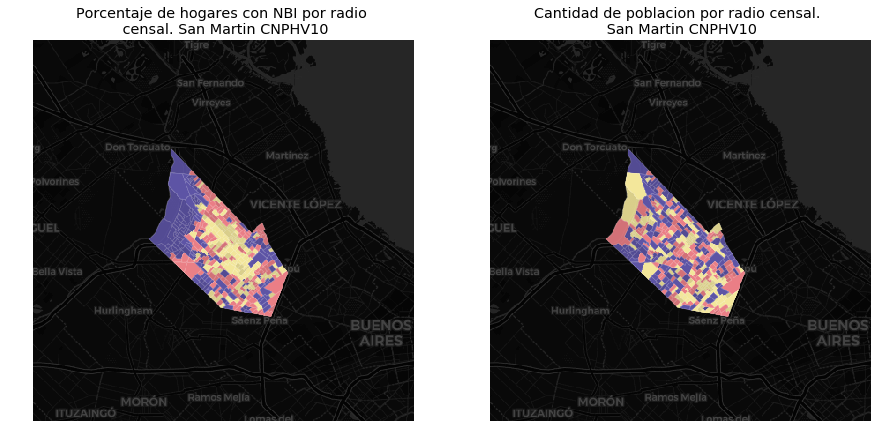

In [44]:
# Ploteamos porcentaje de hogares con nbi y total de poblacion
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

cc.map(layers=[BaseMap('dark'), Layer('radios_sm',
                        color={'column': 'z_nbi',
                               'scheme': styling.sunset(bins= 3, bin_method='quantiles')})],
           ax=ax1,
           zoom=11, lng=-58.5596839, lat=-34.5419559,
           interactive=False,
           size=(432, 432))

cc.map(layers=[BaseMap('dark'), Layer('radios_sm',
                        color={'column': 'totpob',
                               'scheme': styling.sunset(bins=3, bin_method='quantiles')})],
           ax=ax2,
           zoom=11, lng=-58.5596839, lat=-34.5419559,
           interactive=False,
           size=(432, 432))

ax1.set_title('Porcentaje de hogares con NBI por radio \n censal. San Martin CNPHV10')
ax2.set_title('Cantidad de poblacion por radio censal. \n San Martin CNPHV10')
;

Se puede apreciar que donde mayor porcentaje de hogares con nbi hay, no siempre es donde mayor poblacion se concentra. Especialmente esto se puede ver en la seccion contigua al camino del Buen Ayre (donde la cantidad absoluta de poblacion no es tan alta como en zonas centricas)